# Results analysis

In [1481]:
import os
from statistics import mean
import numpy as np

def list_dirs(dr):
    r = []
    for root, dirs, files in os.walk(dr):
        for name in dirs:
            r.append(os.path.join(root, name))
        break
    return r

def list_files(dr):
    r = []
    for root, dirs, files in os.walk(dr):
        for name in files:
            if ".DS_Store" != name:
                r.append(os.path.join(root, name))
        break
    return r


def get_file_name(file_path):
    return os.path.splitext(os.path.basename(file_path))[0]

def get_measurements(dr):
    # reads the files line by line to avoid loading all the results in memory
    experiment_results = {}
    dirs = [d for d in list_dirs(dr)]
    for s in dirs:
        stream_processor = get_file_name(s)

        for m in list_dirs(s):
            model_name = get_file_name(m)
            for mf in list_dirs(m):
                model_format = get_file_name(mf)

                for exp_res in list_files(mf):
                    filename = os.fsdecode(exp_res)
                    print(filename)
                    times = []

                    with open(exp_res) as f_in:
                        for line in f_in:
                            times.append(tuple(map(int, line.rstrip('\n').split(","))))
                                
                    if len(times) == 0:
                        continue

                    # strip warm-up queries
                    warm_up_requests_num = int(len(times) * 0.25)
                    times = times[warm_up_requests_num:]
                    exp_footprint = get_file_name(exp_res)

                    # extract experiment footprint details
                    exp_details = exp_footprint.split("-")[1:]
                    input_rate = int(exp_details[0][2:])
                    batch_size = int(exp_details[1][2:])
                    model_replicas = int(exp_details[2][2:])

                    exp_footprint = str(input_rate) + "_" + str(batch_size) + "_" + str(model_replicas)

                    if exp_footprint not in experiment_results:
                        experiment_results[exp_footprint] = {}
                    if stream_processor not in experiment_results[exp_footprint]:
                        experiment_results[exp_footprint][stream_processor] = {}
                    if model_name not in experiment_results[exp_footprint][stream_processor]:
                        experiment_results[exp_footprint][stream_processor][model_name] = {}
                    if model_format not in experiment_results[exp_footprint][stream_processor][model_name]:
                        experiment_results[exp_footprint][stream_processor][model_name][model_format] = []
                        
                    # compute metrics
                    start_generation = min([item[0] for item in times])
                    end_generation = max([item[0] for item in times])
                    time_to_generate = (end_generation - start_generation) * 0.001 # convert to seconds
                    ir = len(times) / time_to_generate

                    start = min([item[1] for item in times])
                    end = max([item[1] for item in times])
                    
                    time_to_complete = (end - start) * 0.001 # convert to seconds
                    throughput = len(times) / time_to_complete 
                    
                    avg_latency = np.average([end - start for (start, end) in times])
                    
                    experiment_results[exp_footprint][stream_processor][model_name][model_format].append({"avg_latency": avg_latency, "throughput": throughput, "ir": ir})
    return experiment_results

In [1482]:
measurements = get_measurements("../results-gcp/")

../results-gcp/sparkss/ffnn/onnx/20230712163821166-ir1-bs32-mr1.csv
../results-gcp/sparkss/ffnn/onnx/20230712174726820-ir30000-bs1-mr32.csv
../results-gcp/sparkss/ffnn/onnx/20230712152309384-ir2048-bs1-mr1.csv
../results-gcp/sparkss/ffnn/onnx/20230712145926321-ir512-bs1-mr1.csv
../results-gcp/sparkss/ffnn/onnx/20230712151512669-ir4096-bs1-mr1.csv
../results-gcp/sparkss/ffnn/onnx/20230712160646731-ir1-bs128-mr1.csv
../results-gcp/sparkss/ffnn/onnx/20230712162234244-ir1-bs128-mr1.csv
../results-gcp/sparkss/ffnn/onnx/20230712165408309-ir1-bs32-mr1.csv
../results-gcp/sparkss/ffnn/onnx/20230712152910671-ir2048-bs1-mr1.csv
../results-gcp/sparkss/ffnn/onnx/20230712175255011-ir30000-bs1-mr2.csv
../results-gcp/sparkss/ffnn/onnx/20230712173055799-ir30000-bs1-mr4.csv
../results-gcp/sparkss/ffnn/onnx/20230712180921883-ir30000-bs1-mr8.csv
../results-gcp/sparkss/ffnn/onnx/20230712173627087-ir30000-bs1-mr4.csv
../results-gcp/sparkss/ffnn/onnx/20230712144339612-ir512-bs1-mr1.csv
../results-gcp/sparkss

../results-gcp/flink/resnet50/tf-serving/20230424085730226-ir256-bs1-mr1.csv
../results-gcp/flink/resnet50/tf-serving/20230423211725815-ir256-bs1-mr8.csv
../results-gcp/flink/resnet50/tf-serving/20230424081006006-ir256-bs1-mr8.csv
../results-gcp/flink/resnet50/tf-serving/20230424084142248-ir256-bs1-mr1.csv
../results-gcp/flink/resnet50/tf-serving/20230711124932782-ir256-bs1-mr2.csv
../results-gcp/flink/resnet50/tf-serving/20230423210136326-ir256-bs1-mr16.csv
../results-gcp/flink/resnet50/tf-serving/20230423204546746-ir256-bs1-mr32.csv
../results-gcp/flink/resnet50/tf-serving/20230424073829528-ir256-bs1-mr32.csv
../results-gcp/flink/resnet50/tf-serving/20230424072241251-ir256-bs1-mr2.csv
../results-gcp/flink/resnet50/tf-serving/20230424075417741-ir256-bs1-mr16.csv
../results-gcp/flink/resnet50/torchserve/20230423134618265-ir256-bs1-mr8.csv
../results-gcp/flink/resnet50/torchserve/20230423133030615-ir256-bs1-mr16.csv
../results-gcp/flink/resnet50/torchserve/20230423145047721-ir256-bs1-mr

../results-gcp/flink/ffnn/tf-serving/20230708085257497-ir1-bs512-mr1.csv
../results-gcp/flink/ffnn/tf-serving/20230419192134970-ir30000-bs1-mr16.csv
../results-gcp/flink/ffnn/tf-serving/20230711123048484-ir30000-bs1-mr2.csv
../results-gcp/flink/ffnn/tf-serving/20230708101011612-ir30000-bs1-mr2.csv
../results-gcp/flink/ffnn/tf-serving/20230708102408316-ir30000-bs1-mr8.csv
../results-gcp/flink/ffnn/tf-serving/20230708090846415-ir1-bs128-mr1.csv
../results-gcp/flink/ffnn/tf-serving/20230417140904703-ir30000-bs1-mr32.csv
../results-gcp/flink/ffnn/tf-serving/20230419190102668-ir30000-bs1-mr2.csv
../results-gcp/flink/ffnn/tf-serving/20230417151516020-ir30000-bs1-mr4.csv
../results-gcp/flink/ffnn/tf-serving/20230417154505516-ir30000-bs1-mr8.csv
../results-gcp/flink/ffnn/tf-serving/20230419193156754-ir30000-bs1-mr4.csv
../results-gcp/flink/ffnn/tf-serving/20230417150501173-ir30000-bs1-mr16.csv
../results-gcp/flink/ffnn/tf-serving/20230417141356359-ir8192-bs1-mr1.csv
../results-gcp/flink/ffnn/t

../results-gcp/flink-32-N-32/ffnn/standalone/1681818584.5834508-ir30000-bs1-mr8.csv
../results-gcp/flink-32-N-32/ffnn/standalone/1681818583.0074189-ir1-bs32-mr1.csv
../results-gcp/flink-32-N-32/ffnn/tf-serving/20230416201811173-ir30000-bs1-mr8.csv
../results-gcp/flink-32-N-32/ffnn/tf-serving/20230417130205607-ir1-bs128-mr1.csv
../results-gcp/flink-32-N-32/ffnn/tf-serving/20230416203502363-ir30000-bs1-mr4.csv
../results-gcp/flink-32-N-32/ffnn/tf-serving/20230416205257866-ir8192-bs1-mr1.csv
../results-gcp/flink-32-N-32/ffnn/tf-serving/20230416194136459-ir30000-bs1-mr2.csv
../results-gcp/flink-32-N-32/ffnn/tf-serving/20230417132828159-ir30000-bs1-mr32.csv
../results-gcp/flink-32-N-32/ffnn/tf-serving/20230416212517965-ir512-bs1-mr1.csv
../results-gcp/flink-32-N-32/ffnn/tf-serving/20230417124618061-ir1-bs128-mr1.csv
../results-gcp/flink-32-N-32/ffnn/tf-serving/20230417114306933-ir1-bs512-mr1.csv
../results-gcp/flink-32-N-32/ffnn/tf-serving/20230416202315628-ir30000-bs1-mr8.csv
../results-gc

../results-gcp/ray/ffnn/tf-serving/20230709133539595-ir1-bs512-mr1.csv
../results-gcp/ray/ffnn/tf-serving/20230709164339597-ir30000-bs1-mr32.csv
../results-gcp/ray/ffnn/tf-serving/20230709171814943-ir30000-bs1-mr16.csv
../results-gcp/ray/ffnn/tf-serving/20230709180528643-ir30000-bs1-mr4.csv
../results-gcp/ray/ffnn/tf-serving/20230709135126609-ir1-bs128-mr1.csv
../results-gcp/ray/ffnn/tf-serving/20230709143844880-ir1-bs32-mr1.csv
../results-gcp/ray/ffnn/tf-serving/20230709182113049-ir30000-bs1-mr2.csv
../results-gcp/ray/ffnn/tf-serving/20230709142259183-ir1-bs32-mr1.csv
../results-gcp/ray/ffnn/tf-serving/20230709190826584-ir30000-bs1-mr8.csv
../results-gcp/ray/ffnn/tf-serving/20230709140713073-ir1-bs128-mr1.csv
../results-gcp/ray/ffnn/tf-serving/20230709154041486-ir512-bs1-mr1.csv
../results-gcp/ray/ffnn/tf-serving/20230709161210526-ir2048-bs1-mr1.csv
../results-gcp/ray/ffnn/tf-serving/20230709162755170-ir30000-bs1-mr32.csv
../results-gcp/ray/ffnn/tf-serving/20230709155626142-ir2048-bs1

##  Average throughput and latency computations

Compute average measurements per experiment.

In [1483]:
from collections import defaultdict
import copy
import pprint
from statistics import mean, stdev

average_measurements = defaultdict(dict)

for exp_footprint in measurements:
    for stream_processor in measurements[exp_footprint]:
        for model_name in measurements[exp_footprint][stream_processor]:
            for model_format in measurements[exp_footprint][stream_processor][model_name]: 
                if exp_footprint not in average_measurements:
                    average_measurements[exp_footprint] = {}
                if stream_processor not in average_measurements[exp_footprint]:
                    average_measurements[exp_footprint][stream_processor] = {}
                if model_name not in average_measurements[exp_footprint][stream_processor]:
                    average_measurements[exp_footprint][stream_processor][model_name] = {}
                if model_format not in average_measurements[exp_footprint][stream_processor][model_name]:
                    average_measurements[exp_footprint][stream_processor][model_name][model_format] = {"throughput": [], "latency": [], "ir": []}
                           
                measurement = measurements[exp_footprint][stream_processor][model_name][model_format]
                for mm in measurement:
                    throughput = mm['throughput']
                    latency = mm['avg_latency']
                    ir = mm['ir']
                    average_measurements[exp_footprint][stream_processor][model_name][model_format]["throughput"].append(throughput)
                    average_measurements[exp_footprint][stream_processor][model_name][model_format]["latency"].append(latency)
                    average_measurements[exp_footprint][stream_processor][model_name][model_format]["ir"].append(ir)

print(average_measurements)                    

defaultdict(<class 'dict'>, {'1_32_1': {'sparkss': {'ffnn': {'onnx': {'throughput': [0.3349373108999765, 0.3349282296650718], 'latency': [607.2095238095238, 609.3952380952381], 'ir': [0.3349282296650718, 0.3349282296650718]}, 'tf-serving': {'throughput': [0.3349536242953029, 0.33495850236331837], 'latency': [618.6280193236715, 619.864734299517], 'ir': [0.3349509143189089, 0.3349509143189089]}}}, 'kafkastreams': {'ffnn': {'onnx': {'throughput': [0.3348822279390545, 0.3348796439473205], 'latency': [135.2811059907834, 133.5299539170507], 'ir': [0.33487654320987653, 0.33487654320987653]}, 'tf-serving': {'throughput': [0.3348951388802353, 0.33489148736991803], 'latency': [136.0093023255814, 137.05581395348838], 'ir': [0.3348909657320872, 0.3348909657320872]}}}, 'flink': {'ffnn': {'tf-savedmodel': {'throughput': [0.33493570829332714, 0.33493570829332714, 0.3349373108999765], 'latency': [60.55714285714286, 56.72380952380952, 59.10952380952381], 'ir': [0.3349282296650718, 0.33492769549011886, 

# Comparison between serving alternatives

### Sustainable Throughput


In [1472]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from itertools import cycle
import itertools
import seaborn as sns
import random 
from statistics import stdev

##### Flink

In [1358]:
th_labels = ["512_1_1", "2048_1_1", "8192_1_1"]
dl4j = []
onnx = []
savedmodel = []
torchserve = []
tf_serving = []
for ts_l in th_labels:
    th_exps = average_measurements[ts_l]
    exproot = th_exps["flink"]["ffnn"]
    dl4j.append(mean(exproot["dl4j"]["throughput"]))       
    onnx.append(mean(exproot["onnx"]["throughput"]))
    savedmodel.append(mean(exproot["tf-savedmodel"]["throughput"]))
    torchserve.append(mean(exproot["torchserve"]["throughput"]))
    if "tf-serving" in exproot:
        tf_serving.append(mean(exproot["tf-serving"]["throughput"]))
    else:
        tf_serving.append(0)

print("FLINK Sustainable throughput achieved [FFNN, N-N-N setup]")
print("DL4J:", max(dl4j))
print("ONNX:", max(onnx))
print("TF-SavedModel:", max(savedmodel))
print("TorchServe:", max(torchserve))
print("TF-Serving:", max(tf_serving))

FLINK Sustainable throughput achieved [FFNN, N-N-N setup]
DL4J: 787.5322100673918
ONNX: 1373.078565342252
TF-SavedModel: 1289.6835632409231
TorchServe: 225.0953266013911
TF-Serving: 617.2067007542586


In [1359]:
th_labels = ["256_1_1"]
dl4j = []
onnx = []
savedmodel = []
torchserve = []
tf_serving = []
for ts_l in th_labels:
    th_exps = average_measurements[ts_l]
    exproot = th_exps["flink"]["resnet50"]
    onnx.append(mean(exproot["onnx"]["throughput"]))
    torchserve.append(mean(exproot["torchserve"]["throughput"]))
    if "tf-serving" in exproot:
        tf_serving.append(mean(exproot["tf-serving"]["throughput"]))
    else:
        tf_serving.append(0)

print("FLINK Sustainable throughput achieved [RESNET50, N-N-N setup]")
print("ONNX:", max(onnx))
print("TorchServe:", max(torchserve))
print("TF-Serving:", max(tf_serving))

FLINK Sustainable throughput achieved [RESNET50, N-N-N setup]
ONNX: 2.8554429257101384
TorchServe: 0.9171002180937464
TF-Serving: 2.6231451840772957


In [1360]:
th_labels = ["512_1_1", "2048_1_1", "8192_1_1"]
dl4j = []
onnx = []
savedmodel = []
torchserve = []
tf_serving = []
for ts_l in th_labels:
    th_exps = average_measurements[ts_l]
    exproot = th_exps["flink-32-N-32"]["ffnn"]
    dl4j.append(mean(exproot["dl4j"]["throughput"]))       
    onnx.append(mean(exproot["onnx"]["throughput"]))
    savedmodel.append(mean(exproot["tf-savedmodel"]["throughput"]))
    torchserve.append(mean(exproot["torchserve"]["throughput"]))
    if "tf-serving" in exproot:
        tf_serving.append(mean(exproot["tf-serving"]["throughput"]))
    else:
        tf_serving.append(0)

print("FLINK Sustainable throughput achieved [FFNN, 32-N-32 setup]")
print("DL4J:", max(dl4j))
print("ONNX:", max(onnx))
print("TF-SavedModel:", max(savedmodel))
print("TorchServe:", max(torchserve))
print("TF-Serving:", max(tf_serving))

print("\nRaw values per run:")
print("DL4J:", dl4j)
print("ONNX:", onnx)
print("TF-SavedModel:", savedmodel)
print("TorchServe:", torchserve)
print("TF-Serving:", tf_serving)

FLINK Sustainable throughput achieved [FFNN, 32-N-32 setup]
DL4J: 1416.1247999311558
ONNX: 5373.158662840691
TF-SavedModel: 3921.512074914851
TorchServe: 241.82071622711385
TF-Serving: 912.6259159195394

Raw values per run:
DL4J: [512.0236907642319, 1416.1247999311558, 1398.7875158989382]
ONNX: [512.0419155313009, 2044.83372185823, 5373.158662840691]
TF-SavedModel: [512.0736325507323, 2044.9341092878153, 3921.512074914851]
TorchServe: [237.92296517300923, 241.82071622711385, 238.48591881905037]
TF-Serving: [512.2275094955676, 904.7441877225951, 912.6259159195394]


In [761]:
# th_labels = ["256_1_1"]
# dl4j = []
# onnx = []
# savedmodel = []
# torchserve = []
# tf_serving = []
# for ts_l in th_labels:
#     th_exps = average_measurements[ts_l]
#     exproot = th_exps["flink"]["resnet50"]
#     onnx.append(mean(exproot["onnx"]["throughput"]))
#     tf_serving.append(mean(exproot["tf-serving"]["throughput"]))

# print("FLINK Sustainable throughput achieved [FFNN, N-N-N setup]")
# print("ONNX:", max(onnx))
# print("TF-Serving:", max(tf_serving))

# print("\nRaw values per run:")
# print("ONNX:", onnx)
# print("TF-Serving:", tf_serving)

### KafkaStreams

In [1361]:
th_labels = ["512_1_1", "2048_1_1", "8192_1_1"]
ir = [512, 2048, 8192]
onnx = []
tf_serving = []
for ts_l in th_labels:
    th_exps = average_measurements[ts_l]
    if "kafkastreams" in th_exps:
        exproot = th_exps["kafkastreams"]["ffnn"]
        if "onnx" in exproot:
            onnx.append(mean(exproot["onnx"]["throughput"]))
        if "tf-serving" in exproot:
            tf_serving.append(mean(exproot["tf-serving"]["throughput"]))

print("KafkaStreams Maximum throughput achieved (FFNN)")
print("ONNX:", max(onnx))
print("TF-Serving:", max(tf_serving))

print("\nRaw values per run:")
print("ONNX:", onnx)
print("TF-Serving:", tf_serving)

KafkaStreams Maximum throughput achieved (FFNN)
ONNX: 2054.2172041735066
TF-Serving: 702.1210332371955

Raw values per run:
ONNX: [511.964198920694, 2002.390145462427, 2054.2172041735066]
TF-Serving: [512.0527804617113, 700.3820371059776, 702.1210332371955]


### Vertical Scalability
Plot throughput for increasing parallelism

#### FLINK

In [1362]:
ir = ['2', '4', '8', '16', '32']
scl_labels = ["30000_1_2", "30000_1_4", "30000_1_8", "30000_1_16", "30000_1_32"]

f_dl4j = []
dl4j_raw = []

f_onnx = []
onnx_raw = []

f_tf = []
tf_raw = []

f_torchserve = []
torchserve_raw = []

f_tfserving = []
tfserving_raw = []

flink_version = "flink"
model = "ffnn"
for sc in scl_labels:
    sc_exps = average_measurements[sc]
    v = sc_exps[flink_version][model]
    f_dl4j.append(mean(v["dl4j"]["throughput"]))
    dl4j_raw.append(v["dl4j"]["throughput"])
    
    f_onnx.append(mean(v["onnx"]["throughput"]))
    onnx_raw.append(v["onnx"]["throughput"])
    
    f_tf.append(mean(v["tf-savedmodel"]["throughput"]))
    tf_raw.append(v["tf-savedmodel"]["throughput"])
    
    f_torchserve.append(mean(v["torchserve"]["throughput"]))
    torchserve_raw.append(v["torchserve"]["throughput"])
    
    f_tfserving.append(mean(v["tf-serving"]["throughput"]))
    tfserving_raw.append(v["tf-serving"]["throughput"])

print("Parallelism on scoring operator:", ir)
print("  \nFLINK Maximum throughput achieved (FFNN)")
print("  DL4J:", f_dl4j)
print("  ONNX:", f_onnx)
print("  TF-SavedModel:", f_tf)
print("  TorchServe:", f_torchserve)
print("  TF-Serving:", f_tfserving)

print("  \nRaw throughputs per run:")
print("  \nDL4J:", dl4j_raw)
print("  \nONNX:", onnx_raw)
print("  \nTF-SavedModel:", tf_raw)
print("  \nTorchServe:", torchserve_raw)
print("  \nTF-Serving:", tfserving_raw)


Parallelism on scoring operator: ['2', '4', '8', '16', '32']
  
FLINK Maximum throughput achieved (FFNN)
  DL4J: [1351.7118652938864, 2127.445660959718, 2864.5548031835333, 2373.149996147282, 2111.6706165516753]
  ONNX: [2576.7359728573992, 5083.987244105772, 7862.030491822168, 13620.501430239836, 12140.668676474601]
  TF-SavedModel: [2229.877885489839, 4558.554360900409, 7184.245031877236, 10483.278981660624, 9955.98546390154]
  TorchServe: [443.25801677078084, 872.0658626414781, 1417.7881810306103, 2577.8962590952115, 2838.1238759225052]
  TF-Serving: [1285.2218071137133, 2331.1852516302115, 4577.057851520311, 6605.006549211791, 9884.24000651404]
  
Raw throughputs per run:
  
DL4J: [[1372.163613010879, 1331.2601175768937], [2108.299108611137, 2146.592213308299], [2926.5551714180915, 2802.5544349489746], [2499.916669444352, 2246.3833228502112], [1981.155251250109, 2242.1859818532416]]
  
ONNX: [[2568.071002027064, 2570.729333049982, 2591.4075834951523], [5073.532396195527, 5087.26352

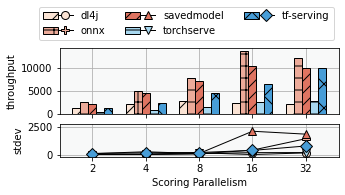

In [1363]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 16
font = {'size'   : 10}
matplotlib.rc('font', **font)
alpha = 1
hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#FAE3D4', '#ECAB9A', '#DF7461', '#A8D8F0', '#479DD7'])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 2), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

width = 0.15
X = np.arange(len(ir))

p1 = ax1.bar(X, f_dl4j, width = width, label='dl4j', color=next(colors), hatch = next(hatches), edgecolor='black')
p2 = ax1.bar(X + width, f_onnx, width = width, label='onnx', color=next(colors), hatch = next(hatches), edgecolor='black')
p3 = ax1.bar(X + 2 * width, f_tf, width = width, label='savedmodel', color=next(colors), hatch = next(hatches), edgecolor='black')
p4 = ax1.bar(X + 3 * width, f_torchserve, width = width, label='torchserve', color=next(colors), hatch = next(hatches), edgecolor='black')
p5 = ax1.bar(X + 4 * width, f_tfserving, width = width, label='tf-serving', color=next(colors), hatch = next(hatches), edgecolor='black')

ax1.set_xticks([i + 0.3 for i in X], ir)
ax1.set_ylabel('throughput')
ax1.set_axisbelow(True)
ax1.grid(True)
ax1.set_facecolor("#F8F9F9")
# ax1.set_yscale('log')
# # ax1.set_title('FFNN (ir = 30k req/s)')
# ax1.axhline(y=30000, color='r', linestyle='--', linewidth=2)
# ax1.text(-0.2, 48000, 'input rate', color='r', fontsize=10, fontstyle='oblique')
# ax1.set_ylim([1, 400000])

# ax1_r = ax1.twinx()
p6 = ax2.plot(X+ 2 * width, [stdev(i) for i in dl4j_raw],label='dl4j', marker='o', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
p7 = ax2.plot(X+ 2 * width, [stdev(i) for i in onnx_raw],label='onnx', marker='P', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
p8 = ax2.plot(X + 2 * width, [stdev(i) for i in tf_raw], label='savedmodel',marker='^', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
p9 = ax2.plot(X + 2 * width, [stdev(i) for i in torchserve_raw], label='torchserve',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
p10 = ax2.plot(X+ 2 * width, [stdev(i) for i in tfserving_raw], label='tf-serving',marker='D', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax2.set_ylim([-200, 2800])
ax2.set_ylabel("stdev")
ax2.set_xticks([i + 0.3 for i in X], ir)
ax2.set_xlabel('Scoring Parallelism')
ax2.set_axisbelow(True)
ax2.grid(True)
ax2.set_facecolor("#F8F9F9")
# ax2.set_yscale('log')

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
labels = labels + labels2
handles = handles + handles2
unique_labels = ['dl4j', 'onnx', 'savedmodel', 'torchserve', 'tf-serving']
combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

ax1.legend(handles=combined_handles, labels=unique_labels, handlelength=3,
          handler_map={tuple: HandlerTuple(ndivide=None, pad=0)}, bbox_to_anchor=(1, 1.7), ncol=3)

plt.subplots_adjust(hspace=0.2)
plt.savefig('flink-ffnn-scalability.pdf', bbox_inches='tight')

In [1365]:
ir = ['2', '4', '8', '16', '32']
scl_labels = ["256_1_2", "256_1_4", "256_1_8", "256_1_16", "256_1_32"]

f_onnx = []
onnx_raw = []
f_torchserve = []
torchserve_raw = []
f_tfserving = []
tfserving_raw = []
flink_version = "flink"
model = "resnet50"
for sc in scl_labels:
    sc_exps = average_measurements[sc]
    v = sc_exps[flink_version][model]
    
    f_onnx.append(mean(v["onnx"]["throughput"]))
    onnx_raw.append(v["onnx"]["throughput"])
    
    f_torchserve.append(mean(v["torchserve"]["throughput"]))
    torchserve_raw.append(v["torchserve"]["throughput"])
    
    f_tfserving.append(mean(v["tf-serving"]["throughput"]))
    tfserving_raw.append(v["tf-serving"]["throughput"])

print("----------------------------------------------")
print("\nFLINK Maximum throughput achieved (ResNet50)")
print("  ONNX:", f_onnx)
print("  TorchServe:", f_torchserve)
print("  TF-Serving:", f_tfserving)

print("  \nRaw throughputs per run:")
print("  \nONNX:", onnx_raw)
print("  \nTF-Serving:", tfserving_raw)

----------------------------------------------

FLINK Maximum throughput achieved (ResNet50)
  ONNX: [5.638036827092428, 11.283582651722478, 15.953568782133097, 26.530853772726644, 22.044443953203398]
  TorchServe: [1.8823818056084267, 3.6294445266121045, 7.266892763108296, 11.349842072996204, 12.68137587339397]
  TF-Serving: [5.161328883849459, 5.867656495101699, 5.8086856728083545, 5.733770847681952, 5.993684280150937]
  
Raw throughputs per run:
  
ONNX: [[5.769366767592211, 5.506706886592645], [11.354232882079529, 11.212932421365426], [15.852068445513995, 16.055069118752197], [28.396564688310427, 24.665142857142857], [22.096895155242237, 21.991992751164563]]
  
TF-Serving: [[5.028426133509346, 5.294231634189572], [5.902126124619028, 5.833186865584371], [5.7105503987449335, 5.906820946871775], [5.777819582923992, 5.689722112439912], [5.843150548494306, 6.1442180118075695]]


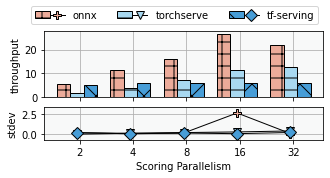

In [1366]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 2), sharex=True, gridspec_kw={'height_ratios': [2, 1]})


width = 0.25
X = np.arange(len(ir))

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#FAE3D4', '#ECAB9A', '#DF7461', '#A8D8F0', '#479DD7'])

next(colors)
next(hatches)
p2 = ax1.bar(X, f_onnx, width = width, label='onnx', color=next(colors), hatch = next(hatches), edgecolor='black')
next(colors)
next(hatches)
p4 = ax1.bar(X + width, f_torchserve, width = width, label='torchserve', color=next(colors), hatch = next(hatches), edgecolor='black')
p5 = ax1.bar(X + 2 * width, f_tfserving, width = width, label='tf-serving', color=next(colors), hatch = next(hatches), edgecolor='black')

ax1.set_xticks([i + 0.3 for i in X], ir)
ax1.set_ylabel('throughput')
ax1.set_axisbelow(True)
ax1.grid(True)
ax1.set_facecolor("#F8F9F9")
# ax1.set_title('ResNet50 (ir = 256 req/s)')

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#FAE3D4', '#ECAB9A', '#DF7461', '#A8D8F0', '#479DD7'])

next(colors)
next(hatches)
p7 = ax2.plot(X + width, [stdev(i) for i in onnx_raw],label='onnx', marker='P', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
next(colors)
next(hatches)
p9 = ax2.plot(X + width, [stdev(i) for i in torchserve_raw], label='torchserve',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
p10 = ax2.plot(X + width, [stdev(i) for i in tfserving_raw], label='tf-serving',marker='D', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax2.set_ylim([0, 3])
ax2.set_ylabel("stdev")
ax2.set_xticks([i + 0.3 for i in X], ir)
ax2.set_xlabel('Scoring Parallelism')
ax2.set_axisbelow(True)
ax2.grid(True)
ax2.set_ylim([-0.7, 3.4])
ax2.set_facecolor("#F8F9F9")
# ax2.set_yscale('log')

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
labels = labels + labels2
handles = handles + handles2
unique_labels = ['onnx', 'torchserve', 'tf-serving']
combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

ax1.legend(handles=combined_handles, labels=unique_labels, handlelength=3,
          handler_map={tuple: HandlerTuple(ndivide=None, pad=0)}, bbox_to_anchor=(1, 1.45), ncol=3)

plt.subplots_adjust(hspace=0.2)
plt.savefig('flink-resnet50-scalability.pdf', bbox_inches='tight')

### Latency
Plot latency for varying batch sizes

#### FLINK

In [1367]:
bs = ['32', '128', '512']
scl_labels = ["1_32_1", "1_128_1", "1_512_1"]

f_dl4j = []
dl4j_raw = []
f_onnx = []
onnx_raw = []
f_tf = []
tf_raw = []
f_torchserve = []
torchserve_raw = []
f_tf_serving = []
tf_serving_raw = []
processor = "flink"
model = "ffnn"
for sc in scl_labels:
    sc_exps = average_measurements[sc][processor][model]
    f_dl4j.append(mean(sc_exps["dl4j"]["latency"]))
    dl4j_raw.append(sc_exps["dl4j"]["latency"])
    
    f_onnx.append(mean(sc_exps["onnx"]["latency"]))
    onnx_raw.append(sc_exps["onnx"]["latency"])
    
    f_tf.append(mean(sc_exps["tf-savedmodel"]["latency"]))
    tf_raw.append(sc_exps["tf-savedmodel"]["latency"])
    
    f_torchserve.append(mean(sc_exps["torchserve"]["latency"]))
    torchserve_raw.append(sc_exps["torchserve"]["latency"])
    
    f_tf_serving.append(mean(sc_exps["tf-serving"]["latency"]))
    tf_serving_raw.append(sc_exps["tf-serving"]["latency"])

print("FLINK Average latencies for FFNN model")
print("DL4J:", f_dl4j)
print("ONNX:", f_onnx)
print("TF-SavedModel:", f_tf)
print("TorchServe:", f_torchserve)
print("TF-Serving:", f_tf_serving)

print("\nRaw latency measurements per run")
print("DL4J:", dl4j_raw)
print("ONNX:", onnx_raw)
print("TF-SavedModel:", tf_raw)
print("TorchServe:", torchserve_raw)
print("TF-Serving:", tf_serving_raw)

FLINK Average latencies for FFNN model
DL4J: [59.65141983398864, 229.1278801843318, 852.4225806451614]
ONNX: [53.87844036697248, 167.4401133048662, 758.7926267281107]
TF-SavedModel: [58.7968253968254, 188.12539682539682, 847.1866359447005]
TorchServe: [171.32523311987418, 594.5850241545894, 2415.798264029979]
TF-Serving: [65.22489607909223, 191.57065498258623, 887.7761487473317]

Raw latency measurements per run
DL4J: [[56.05045871559633, 63.25238095238095], [251.21428571428572, 207.04147465437788], [768.6451612903226, 936.2]]
ONNX: [[53.37614678899082, 54.38073394495413], [172.9908256880734, 161.889400921659], [754.4101382488479, 763.1751152073733]]
TF-SavedModel: [[60.55714285714286, 56.72380952380952, 59.10952380952381], [182.98095238095237, 202.53333333333333, 178.86190476190475], [923.0, 771.3732718894009]]
TorchServe: [[171.10628019323673, 171.54418604651164], [594.5700483091788, 594.6], [2352.3598130841124, 2479.236714975845]]
TF-Serving: [[70.33816425120773, 60.11162790697674],

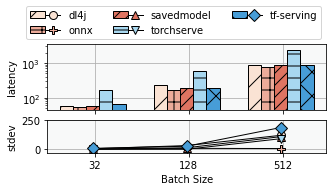

In [1368]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 14
font = {'size'   : 10}
matplotlib.rc('font', **font)
alpha = 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 2), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#FAE3D4', '#ECAB9A', '#DF7461', '#A8D8F0', '#479DD7'])

X = np.arange(len(bs))
width = 0.14

ax1.bar(X, f_dl4j, width = width, label='dl4j', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, f_onnx, width = width, label='onnx', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 2 * width, f_tf, width = width, label='savedmodel', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 3 * width, f_torchserve, width = width, label='torchserve', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 4 * width, f_tf_serving, width = width, label='tf-serving', color=next(colors), hatch = next(hatches), edgecolor='black')

ax1.set_xticks([i + 0.22 for i in X], bs)
ax1.set_yscale('log')
ax1.set_ylim(ymax=3500)
# ax1.set_xlabel('Batch Size')
ax1.set_ylabel('latency')
ax1.set_axisbelow(True)
ax1.grid(True)
ax1.set_facecolor("#F8F9F9")

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#FAE3D4', '#ECAB9A', '#DF7461', '#A8D8F0', '#479DD7'])

p6 = ax2.plot(X+ 2 * width, [stdev(i) for i in dl4j_raw],label='dl4j', marker='o', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
p7 = ax2.plot(X+ 2 * width, [stdev(i) for i in onnx_raw],label='onnx', marker='P', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
p8 = ax2.plot(X + 2 * width, [stdev(i) for i in tf_raw], label='savedmodel',marker='^', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
p9 = ax2.plot(X + 2 * width, [stdev(i) for i in torchserve_raw], label='torchserve',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
p10 = ax2.plot(X + 2 * width, [stdev(i) for i in tf_serving_raw], label='tf-serving',marker='D', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax2.set_ylim([-30, 250])
ax2.set_ylabel("stdev")
ax2.set_xticks([i + 0.3 for i in X], bs)
ax2.set_xlabel('Batch Size')
ax2.set_axisbelow(True)
ax2.grid(True)
ax2.set_facecolor("#F8F9F9")

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
labels = labels + labels2
handles = handles + handles2
unique_labels = ['dl4j', 'onnx', 'savedmodel', 'torchserve', 'tf-serving']
combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

ax1.legend(handles=combined_handles, labels=unique_labels, handlelength=3,
          handler_map={tuple: HandlerTuple(ndivide=None, pad=0)}, bbox_to_anchor=(1, 1.65), ncol=3)

# plt.subplots_adjust(hspace=0.3)
plt.savefig('flink-ffnn-latency.pdf', bbox_inches='tight')

### ResNet50 - CPU vs GPU

ONNX CPU: [4064.103174603175] STDEV: 32.515688017419336
ONNX GPU: []
TF-Serving CPU: [4554.237903225807] STDEV: 86.78595244256475
TF-Serving GPU: [3016.4719999999998] STDEV: 32.69661756206612


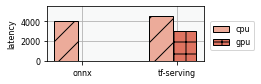

In [1543]:
import math

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 14
font = {'size'   : 8}
matplotlib.rc('font', **font)
alpha = 1

fig, ax1 = plt.subplots(1,figsize=(2.8, 1))

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#FAE3D4', '#ECAB9A', '#DF7461', '#A8D8F0', '#479DD7'])

bs = ['8']
scl_labels = ["1_8_1"]

onnx_cpu = []
onnx_cpu_raw = []
tf_serving_cpu = []
tf_serving_cpu_raw = []

onnx_gpu = []
onnx_gpu_raw = []
tf_serving_gpu = []
tf_serving_gpu_raw = []
for sc in scl_labels:
    sc_exps = average_measurements[sc]
    onnx_cpu.append(mean(sc_exps["flink"]["resnet50-cpu"]["onnx"]["latency"]))
    onnx_cpu_raw.append(sc_exps["flink"]["resnet50-cpu"]["onnx"]["latency"])
#     onnx_gpu.append(mean(sc_exps["flink"]["resnet50-gpu"]["onnx"]["latency"]))
    tf_serving_cpu.append(mean(sc_exps["flink"]["resnet50-cpu"]["tf-serving"]["latency"]))
    tf_serving_cpu_raw.append(sc_exps["flink"]["resnet50-cpu"]["tf-serving"]["latency"])
    tf_serving_gpu.append(mean(sc_exps["flink"]["resnet50-gpu"]["tf-serving"]["latency"]))
    tf_serving_gpu_raw.append(sc_exps["flink"]["resnet50-gpu"]["tf-serving"]["latency"])

print("ONNX CPU:", onnx_cpu, "STDEV:", stdev(onnx_cpu_raw[0]))
print("ONNX GPU:", onnx_gpu)
print("TF-Serving CPU:", tf_serving_cpu, "STDEV:", stdev(tf_serving_cpu_raw[0]))
print("TF-Serving GPU:", tf_serving_gpu, "STDEV:", stdev(tf_serving_gpu_raw[0]))


X = np.arange(2)
width = 0.25

ax1.bar(X, [onnx_cpu[0], tf_serving_cpu[0]], width = width, label='cpu', color='#ECAB9A', hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, [0, tf_serving_gpu[0]], width = width, label='gpu', color='#DF7461', hatch = next(hatches), edgecolor='black')

ax1.set_xticks([i + 0.17 for i in X], ['onnx', 'tf-serving'])
ax1.set_ylim(ymax=5500)
ax1.legend(ncol=1, bbox_to_anchor=(1.35, 0.8))
ax1.set_ylabel('latency')
ax1.set_axisbelow(True)
ax1.grid(True)
ax1.set_facecolor("#F8F9F9")

stdev_tf_cpu = [stdev(i) for i in tf_serving_cpu_raw]
stdev_tf_gpu = [stdev(i) for i in tf_serving_gpu_raw]


# plt.savefig('flink-resnet50-gpu.pdf', bbox_inches='tight')

# Comparison between stream processors

## Sustainable throughput

In [1150]:
import math

In [1369]:
th_labels = ["512_1_1", "1024_1_1", "2048_1_1", "4096_1_1", "8192_1_1"]
ir = ['onnx', 'tf-serving']
tfr_ks_onnx = []
tfr_ks_tf_serving = []
for ts_l in th_labels:
    th_exps = average_measurements[ts_l]
    if "kafkastreams" in th_exps:
        v = th_exps["kafkastreams"]["ffnn"]
        tfr_ks_onnx.append(mean(v["onnx"]["throughput"]))
        if "tf-serving" in v:
            tfr_ks_tf_serving.append(mean(v["tf-serving"]["throughput"]))
        else:
            tfr_ks_tf_serving.append(0)

print("\nMaximum average throughput achieved")
print("KafkaStreams ONNX:", max(tfr_ks_onnx))
print("KafkaStreams TF-Serving:", max(tfr_ks_tf_serving))


Maximum average throughput achieved
KafkaStreams ONNX: 2054.2172041735066
KafkaStreams TF-Serving: 702.1210332371955


In [1370]:
tfr_flink_onnx = []
tfr_flink_tf_serving_cpu = []

for ts_l in th_labels:
    th_exps = average_measurements[ts_l]
    if flink_version in th_exps:
        v = th_exps["flink"]["ffnn"]
        tfr_flink_onnx.append(mean(v["onnx"]["throughput"]))
        if "tf-serving" in th_exps[flink_version]["ffnn"]:
            tfr_flink_tf_serving_cpu.append(mean(v["tf-serving"]["throughput"]))
        else:
            tfr_flink_tf_serving_cpu.append(0)

print("\nMaximum average throughput achieved")
print("Flink ONNX:", max(tfr_flink_onnx))
print("Flink TF-Serving:", max(tfr_flink_tf_serving_cpu))


Maximum average throughput achieved
Flink ONNX: 1373.078565342252
Flink TF-Serving: 617.2067007542586


In [1371]:
tfr_ray_onnx = []
tfr_ray_tf_serving_cpu = []

for ts_l in th_labels:
    th_exps = average_measurements[ts_l]
    if flink_version in th_exps:
        v = th_exps["ray"]["ffnn"]
        if "onnx" in v:
            tfr_ray_onnx.append(mean(v["onnx"]["throughput"]))
        else:
            tfr_ray_onnx.append(0)
        if "tf-serving" in v:
            tfr_ray_tf_serving_cpu.append(mean(v["tf-serving"]["throughput"]))
        else:
            tfr_ray_tf_serving_cpu.append(0)
            
print("\nMaximum average throughput achieved")
print("Ray ONNX:", max(tfr_ray_onnx))
print("Ray TF-serving:", max(tfr_ray_tf_serving_cpu))


Maximum average throughput achieved
Ray ONNX: 157.40748980585292
Ray TF-serving: 122.4441806010463


In [1372]:
tfr_spark_onnx = []
tfr_spark_tf_serving_cpu = []

for ts_l in th_labels:
    th_exps = average_measurements[ts_l]
    if "sparkss" in th_exps:
        v = th_exps["sparkss"]["ffnn"]
        if "onnx" in v:
            tfr_spark_onnx.append(mean(v["onnx"]["throughput"]))
        else:
            tfr_spark_onnx.append(0)
        if "tf-serving" in v:
            tfr_spark_tf_serving_cpu.append(mean(v["tf-serving"]["throughput"]))
        else:
            tfr_spark_tf_serving_cpu.append(0)

print("Spark SS ONNX:", max(tfr_spark_onnx), tfr_spark_onnx)
print("Spark SS TF-serving:", max(tfr_spark_tf_serving_cpu), tfr_spark_tf_serving_cpu)

Spark SS ONNX: 4044.9976197383867 [511.9931841684516, 2035.7037908592283, 4044.9976197383867]
Spark SS TF-serving: 3924.495774218178 [512.1289413112202, 2039.9171595814587, 3924.495774218178]


In [506]:
# mpl.rcParams['lines.linewidth'] = 4
# mpl.rcParams['lines.markersize'] = 16
# font = {'size': 12}
# matplotlib.rc('font', **font)
# alpha = 1

# fig, ax1 = plt.subplots(1, figsize=(4, 2))

# flink_onnx = max(tfr_flink_onnx)
# flink_tfserving = max(tfr_flink_tf_serving_cpu)
# ks_onnx = max(tfr_ks_onnx)
# ks_tfserving = max(tfr_ks_tf_serving)
# ray_onnx = max(tfr_ray_onnx)
# ray_tfsavedmodel = max(tfr_ray_tf_serving_cpu)
# # spark_onnx = max(tfr_spark_onnx)
# # spark_tfsavedmodel = max(tfr_spark_tf_serving_cpu)

# flink = [flink_onnx, flink_tfserving]
# ks = [ks_onnx, ks_tfserving]
# ray = [ray_onnx, ray_tfsavedmodel]
# # spark = [spark_onnx, spark_tfsavedmodel]

# width = 0.17
# X = np.arange(len(ir))

# ax1.bar(X, flink, width=width, label='flink', color=[next(colors), next(colors_light)], hatch=next(hatches),
#         edgecolor='black')
# ax1.bar(X + width, ks, width=width, label='kafkastreams', color=[next(colors), next(colors_light)], hatch=next(hatches),
#         edgecolor='black')
# # ax1.bar(X + 2 * width, spark, width=width, label='spark ss', color=[next(colors), next(colors_light)],
# #         hatch=next(hatches), edgecolor='black')
# bars = ax1.bar(X + 3 * width, ray, width=width, label='ray', color=[next(colors), next(colors_light)],
#                hatch=next(hatches), edgecolor='black')

# bars[1].set_linestyle('--')

# ax1.set_xticks([i + 0.25 for i in X], ir)
# ax1.set_ylabel('Throughput (req/s)')
# ax1.set_axisbelow(True)
# ax1.grid(True)
# # ax1.set_yscale('log')

# handles, labels = ax1.get_legend_handles_labels()
# unique_labels = list(np.unique(labels))

# combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

# ax1.legend(ncol=1, bbox_to_anchor=(1, 0.85))

# plt.savefig('stream-processors-comparison-throughput.pdf', bbox_inches='tight')

### Latency under sustainable throughput

In [ ]:
# import glob

# mpl.rcParams['lines.linewidth'] = 3
# mpl.rcParams['lines.markersize'] = 16
# font = {'size'   : 12}
# matplotlib.rc('font', **font)
# alpha = 1


# systems = ["flink", "kafkastreams", "ray", "sparkss"]
# fig, ax1 = plt.subplots(1, 1, figsize=(2, 2))
# timestamps = 150
# colors = itertools.cycle(['#5896D1', '#EEC876', '#7661B4', '#5AA56D'])

# for s in systems:
#     times = []
#     tt = []
#     with open(glob.glob("../results-final/results/" + s + "/ffnn/onnx/*-ir512-bs1-mr1.csv")[0]) as f_in:
#         for line in f_in:
#             t = list(map(int, line.rstrip('\n').split(",")))
#             tt.append(t)
#         tt = sorted(tt, key=lambda x: x[1])
#         for t in tt:
#             times.append(t[1] - t[0])

#     sz = int(0.25 * len(times))
#     times = times[sz:]
#     ax1.plot(range(timestamps), times[0:timestamps], label=s, color=next(colors))

# ax1.set_yscale('log')
# ax1.set_ylim(ymax=3000000)
# ax1.set_xlim((0, 100))

# ax1.grid(True)

# ax1.legend(ncol=1, loc='center left', bbox_to_anchor=(1.05, 0.45))
# ax1.set_ylabel('Latency (ms/batch)')
# ax1.set_xlabel('Request Number')


# plt.savefig('stream-processors-comparison-latency-over-time-sust-throughp.pdf', bbox_inches='tight')

### Vertical Scalability

In [1379]:

ir = ['onnx', 'tf-serving']
labels = ['2', '4', '8', '16', '32']
scl_labels = ["30000_1_2", "30000_1_4", "30000_1_8", "30000_1_16", "30000_1_32"]

f_onnx, f_onnx_raw = [], []
f_tf_serving, f_tf_serving_raw = [], []
ks_onnx, ks_onnx_raw = [], []
ks_tf_serving, ks_tf_serving_raw = [], []
r_onnx, r_onnx_raw = [], []
r_tf_serving, r_tf_serving_raw = [], []
s_onnx, s_onnx_raw = [], []
s_tf_serving, s_tf_serving_raw = [], []
processor = "flink"
model = "ffnn"
for sc in scl_labels:
    sc_exps = average_measurements[sc]
    ffnn_ = sc_exps[processor][model]
    if "onnx" in ffnn_:
        f_onnx.append(mean(ffnn_["onnx"]["throughput"]))
        f_onnx_raw.append(ffnn_["onnx"]["throughput"])
    else:
        f_onnx.append(1)
    f_tf_serving.append(mean(ffnn_["tf-serving"]["throughput"]))
    f_tf_serving_raw.append(ffnn_["tf-serving"]["throughput"])
    if "kafkastreams" in sc_exps:
        kafkastreams_ = sc_exps["kafkastreams"][model]
        ks_onnx.append(mean(kafkastreams_["onnx"]["throughput"]))
        ks_onnx_raw.append(kafkastreams_["onnx"]["throughput"])
        ks_tf_serving.append(mean(kafkastreams_["tf-serving"]["throughput"]))
        ks_tf_serving_raw.append(kafkastreams_["tf-serving"]["throughput"])
    else:
        ks_onnx.append(1)
        ks_tf_serving.append(1)
    if "ray" in sc_exps:
        ray_ = sc_exps["ray"][model]
        r_onnx.append(mean(ray_["onnx"]["throughput"]))
        r_onnx_raw.append(ray_["onnx"]["throughput"])
        r_tf_serving.append(mean(ray_["tf-serving"]["throughput"]))
        r_tf_serving_raw.append(ray_["tf-serving"]["throughput"])
    else:
        r_onnx.append(1)
        r_tf_serving.append(1)
    if "sparkss" in sc_exps:
        sparkss_ = sc_exps["sparkss"][model]
        s_onnx.append(mean(sparkss_["onnx"]["throughput"]))
        s_onnx_raw.append(sparkss_["onnx"]["throughput"])
        s_tf_serving.append(mean(sparkss_["tf-serving"]["throughput"]))
        s_tf_serving_raw.append(sparkss_["tf-serving"]["throughput"])
    else:
        s_onnx.append(1)
        s_tf_serving.append(1)
        
print("Parallelism on scoring operator:", [2, 4, 8, 16, 32])
print("\nThroughput achieved")

print("Flink ONNX:\n", f_onnx)
print("Flink TF-Serving:\n", f_tf_serving)

print("KafkaStreams ONNX:\n", ks_onnx)
print("KafkaStreams TF-Serving:\n", ks_tf_serving)

print("Ray ONNX:\n", r_onnx)
print("Ray TF-Serving:\n", r_tf_serving)

print("SparkSS ONNX:\n", s_onnx)
print("SparkSS TF-Serving:\n", s_tf_serving)

print("\n-------------------------")
print("Raw throughputs obtainer per run")
print("Flink ONNX:\n", f_onnx_raw)
print("Flink TF-Serving:\n", f_tf_serving_raw)

print("KafkaStreams ONNX:\n", ks_onnx_raw)
print("KafkaStreams TF-Serving:\n", ks_tf_serving_raw)

print("SparkSS ONNX:\n", s_onnx_raw)
print("SparkSS TF-Serving:\n", s_tf_serving_raw)

print("Ray ONNX:\n", r_onnx_raw)
print("Ray TF-Serving:\n", r_tf_serving_raw)

Parallelism on scoring operator: [2, 4, 8, 16, 32]

Throughput achieved
Flink ONNX:
 [2576.7359728573992, 5083.987244105772, 7862.030491822168, 13620.501430239836, 12140.668676474601]
Flink TF-Serving:
 [1285.2218071137133, 2331.1852516302115, 4577.057851520311, 6605.006549211791, 9884.24000651404]
KafkaStreams ONNX:
 [4088.34217259628, 6856.608485149489, 12578.004791285564, 23087.034950504523, 20972.67379927558]
KafkaStreams TF-Serving:
 [1418.755312039996, 2703.4728967342744, 5088.3711032844585, 7776.903249157359, 9327.51118200149]
Ray ONNX:
 [311.7072570478133, 621.6246708107942, 1223.8753229462027, 614.7213338189347, 304.4654208804451]
Ray TF-Serving:
 [221.8611164029204, 351.8837730706066, 455.4408377304586, 360.44688078738375, 229.08176144324267]
SparkSS ONNX:
 [23030.319606350033, 22963.950845499374, 22538.012797063624, 21643.876328187267, 22930.728490383794]
SparkSS TF-Serving:
 [10240.176944471212, 10494.728994095814, 10916.263241444787, 9455.281658291005, 10635.10391116421]



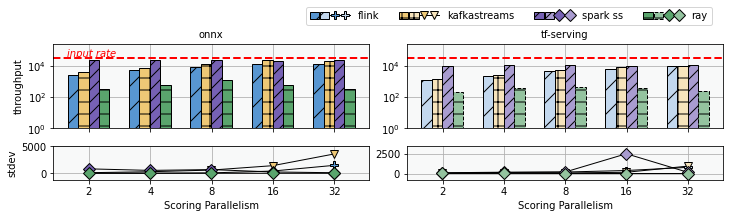

In [1380]:
from matplotlib.legend_handler import HandlerTuple

# mpl.rcParams['lines.linewidth'] = 4
# mpl.rcParams['lines.markersize'] = 16
font = {'size'   : 10}
matplotlib.rc('font', **font)
alpha = 1

fig, axs = plt.subplots(2, 2 ,figsize=(12, 2.5), sharex=True, gridspec_kw={'height_ratios': [2, 0.8]})
ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

labels = ['2', '4', '8', '16', '32']
X = np.arange(len(labels))

width = 0.17

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#5896D1', '#EEC876', '#7661B4', '#5AA56D'])

ax1.bar(X, f_onnx, width = width, label='flink', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, ks_onnx, width = width, label='kafkastreams', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 2 * width, s_onnx, width = width, label='spark ss', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 3 * width, r_onnx, width = width, label='ray', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.set_ylabel('throughput')
ax1.set_facecolor("#F8F9F9")

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#C3D8EE', '#F7E4BC', '#A99CD0', '#94C39F'])

ax2.bar(X, f_tf_serving, width = width, label='flink', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.bar(X + width, ks_tf_serving, width = width, label='kafkastreams', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.bar(X + 2 * width, s_tf_serving, width = width, label='spark ss', color=next(colors), hatch = next(hatches), edgecolor='black')
bars = ax2.bar(X + 3 * width, r_tf_serving, width = width, label='ray', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.set_facecolor("#F8F9F9")
for bar in bars:
    bar.set_linestyle('--')

for ax in axs[0][:]:
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_ylim([1, 250000])
    ax.set_yscale('log')
    ax.axhline(y=30000, color='r', linestyle='--', linewidth=2)
    
for ax in axs[1][:]:
    ax.set_xlabel('Scoring Parallelism')
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_xticks([int(i) + 0.26 for i in X], labels)
                  
hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#5896D1', '#EEC876', '#7661B4', '#5AA56D'])

ax3.plot(X + 1.5*width, [stdev(i) for i in f_onnx_raw] ,label='flink', marker='P', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax3.plot(X + 1.5*width, [stdev(i) for i in ks_onnx_raw], label='kafkastreams',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax3.plot(X + 1.5*width, [stdev(i) for i in s_onnx_raw], label='spark ss',marker='D', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax3.plot(X + 1.5*width, [stdev(i) for i in r_onnx_raw], label='ray',marker='D', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax3.set_ylim([-1200, 5000])
ax3.set_ylabel('stdev')
ax3.set_facecolor("#F8F9F9")

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#C3D8EE', '#F7E4BC', '#A99CD0', '#94C39F'])

b = [stdev(ks_tf_serving_raw[i]) for i in range(len(ks_onnx_raw)-1)]
b.append(0)
ax4.plot(X + 1.5*width, [stdev(i) for i in f_tf_serving_raw] ,label='flink', marker='P', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax4.plot(X + 1.5*width, [stdev(i) for i in ks_tf_serving_raw], label='kafkastreams',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax4.plot(X + 1.5*width, [stdev(i) for i in s_tf_serving_raw], label='spark ss',marker='D', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax4.plot(X + 1.5*width, [stdev(i) for i in r_tf_serving_raw], label='ray',marker='D', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax4.set_ylim([-800, 3500])
ax4.set_facecolor("#F8F9F9")
                  
ax1.text(-0.1, 42000, 'input rate', color='r', fontsize=10, fontstyle='oblique')
ax1.set_title('onnx', fontsize=10)
ax2.set_title('tf-serving', fontsize=10)
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
handles4, labels4 = ax4.get_legend_handles_labels()
labels = labels + labels2 + labels3 + labels4
handles = handles + handles2 + handles3 + handles4
unique_labels = ['flink', 'kafkastreams', 'spark ss', 'ray']
combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

ax1.legend(handles=combined_handles, labels=unique_labels, handlelength=4,
          handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)}, bbox_to_anchor=(2.1, 1.5), ncol=4)

plt.subplots_adjust(wspace=0.12, hspace=0.3)

plt.savefig('stream-processors-comparison-scalability.pdf', bbox_inches='tight')

### End-to-end Latency

In [1375]:
ir = ['32', '128', '512']
scl_labels = ["1_32_1", "1_128_1", "1_512_1"]
processor = "flink"

f_onnx, f_onnx_std = [], []
f_tf_serving, f_tf_serving_std = [], []
ks_onnx, ks_onnx_std = [], []
ks_tf_serving, ks_tf_serving_std = [], []
r_onnx, r_onnx_std = [], []
r_tf_serving, r_tf_serving_std = [], []
s_onnx, s_onnx_std = [], []
s_tf_serving, s_tf_serving_std = [], []
for sc in scl_labels:
    sc_exps = average_measurements[sc]
    ffnn_ = sc_exps[processor]["ffnn"]
    
    f_onnx.append(mean(ffnn_["onnx"]["latency"]))
    f_onnx_std.append(ffnn_["onnx"]["latency"])
    f_tf_serving.append(mean(ffnn_["tf-serving"]["latency"]))
    f_tf_serving_std.append(ffnn_["tf-serving"]["latency"])
    
    kafkastreams_ = sc_exps["kafkastreams"]["ffnn"]
    ks_onnx.append(mean(kafkastreams_["onnx"]["latency"]))
    ks_onnx_std.append(kafkastreams_["onnx"]["latency"])
    ks_tf_serving.append(mean(kafkastreams_["tf-serving"]["latency"]))
    ks_tf_serving_std.append(kafkastreams_["tf-serving"]["latency"])
    if "ray" in sc_exps:
        ray_ = sc_exps["ray"]["ffnn"]
        r_onnx.append(mean(ray_["onnx"]["latency"]))
        r_onnx_std.append(ray_["onnx"]["latency"])
        r_tf_serving.append(mean(ray_["tf-serving"]["latency"]))
        r_tf_serving_std.append(ray_["tf-serving"]["latency"])
    else:
        r_onnx.append(0)
        r_tf_serving.append(0)
    if "sparkss" in sc_exps:
        sparkss_ = sc_exps["sparkss"]["ffnn"]
        s_onnx.append(mean(sparkss_["onnx"]["latency"]))
        s_onnx_std.append(sparkss_["onnx"]["latency"])
        s_tf_serving.append(mean(sparkss_["tf-serving"]["latency"]))
        s_tf_serving_std.append(sparkss_["tf-serving"]["latency"])
    else:
        s_onnx.append(0)
        s_tf_serving.append(0)

print("Parallelism on scoring operator:", ir)
print("\nMaximum throughput achieved")
print("Flink ONNX:", f_onnx)
print("  Raw:", f_onnx_std)
print("\nFlink TF-Serving:", f_tf_serving)
print("  Raw:", f_tf_serving_std)
print("\nKafkaStreams ONNX:", ks_onnx)
print("  Raw:", ks_onnx_std)
print("\nKafkaStreams TF-Serving:", ks_tf_serving)
print("  Raw:", ks_tf_serving_std)
print("\nRay ONNX:", r_onnx)
print("  Raw:", r_onnx_std)
print("\nRay TF-SavedModel:", r_tf_serving)
print("  Raw:", r_tf_serving_std)
print("\nSpark SS ONNX:", s_onnx)
print("  Raw:", s_onnx_std)
print("\nSpark SS TF-SavedModel:", s_tf_serving)
print("  Variance:", s_tf_serving_std)

Parallelism on scoring operator: ['32', '128', '512']

Maximum throughput achieved
Flink ONNX: [53.87844036697248, 167.4401133048662, 758.7926267281107]
  Raw: [[53.37614678899082, 54.38073394495413], [172.9908256880734, 161.889400921659], [754.4101382488479, 763.1751152073733]]

Flink TF-Serving: [65.22489607909223, 191.57065498258623, 887.7761487473317]
  Raw: [[70.33816425120773, 60.11162790697674], [173.2186046511628, 209.92270531400968], [757.2093023255813, 1018.3429951690821]]

KafkaStreams ONNX: [134.40552995391704, 201.58986175115206, 513.8778801843318]
  Raw: [[135.2811059907834, 133.5299539170507], [201.4147465437788, 201.76497695852535], [517.7096774193549, 510.04608294930875]]

KafkaStreams TF-Serving: [136.5325581395349, 222.38974598722143, 522.7213625521765]
  Raw: [[136.0093023255814, 137.05581395348838], [232.06451612903226, 212.71497584541063], [519.3209302325581, 526.1217948717949]]

Ray ONNX: [46.62857142857143, 132.62857142857143, 499.45238095238096]
  Raw: [[46.671

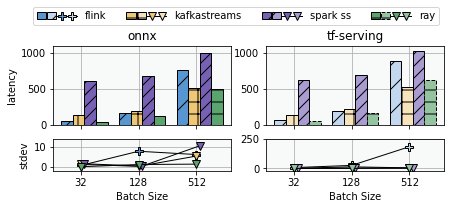

In [1376]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 16
font = {'size'   : 10}
matplotlib.rc('font', **font)
alpha = 1

fig, axs = plt.subplots(2, 2 ,figsize=(7, 2.3), sharex=True, gridspec_kw={'height_ratios': [2, 0.8]})
ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

ax1.set_facecolor("#F8F9F9")
ax2.set_facecolor("#F8F9F9")
ax3.set_facecolor("#F8F9F9")
ax4.set_facecolor("#F8F9F9")

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#5896D1', '#EEC876', '#7661B4', '#5AA56D'])
# hatches = itertools.cycle(['/', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
# colors = itertools.cycle(['#5896D1', '#EEC876', '#5AA56D'])

X = np.arange(len(ir))
width = 0.2
# -----
ax1.bar(X, f_onnx, width = width, label='flink', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, ks_onnx, width = width, label='kafkastreams', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 2 * width, s_onnx, width = width, label='spark ss', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 3 * width, r_onnx, width = width, label='ray', color=next(colors), hatch = next(hatches), edgecolor='black')
# ax1.set_xticks([i for i in X], ir)
ax1.set_ylabel('latency')
ax1.set_title('onnx', fontsize=12)

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#C3D8EE', '#F7E4BC', '#A99CD0', '#94C39F'])
ax2.bar(X, f_tf_serving, width = width, label='flink', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.bar(X + width, ks_tf_serving, width = width, label='kafkastreams', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.bar(X + 2 * width, s_tf_serving, width = width, label='spark ss', color=next(colors), hatch = next(hatches), edgecolor='black')
bars = ax2.bar(X + 3 * width, r_tf_serving, width = width, label='ray', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.set_xticks([i + 0.24 for i in X], ir)
ax2.set_title('tf-serving', fontsize=12)

for bar in bars:
    bar.set_linestyle('--')
# ax2.set_yscale('log')

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#5896D1', '#EEC876', '#7661B4', '#5AA56D'])

ax3.plot(X + 1.2*width, [stdev(i) for i in f_onnx_std] ,label='flink', marker='P', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax3.plot(X + 1.2*width, [stdev(i) for i in ks_onnx_std], label='kafkastreams',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax3.plot(X + 1.5*width, [stdev(i) for i in s_onnx_std], label='spark ss',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax3.plot(X + 1.2*width, [stdev(i) for i in r_onnx_std], label='ray',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax3.set_ylim([-2, 14])
ax3.set_ylabel('stdev')

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#C3D8EE', '#F7E4BC', '#A99CD0', '#94C39F'])
ax4.plot(X + 1.2*width, [stdev(i) for i in f_tf_serving_std] ,label='flink', marker='P', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax4.plot(X + 1.2*width, [stdev(i) for i in ks_tf_serving_std], label='kafkastreams',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax4.plot(X + 1.5*width, [stdev(i) for i in s_tf_serving_std], label='spark ss',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax4.plot(X + 1.2*width, [stdev(i) for i in r_tf_serving_std], label='ray',marker='v', linestyle='-', lw=1, markersize=8, color='black', markerfacecolor=next(colors))
ax4.set_ylim([-20, 250])

for ax in axs[0]:
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_ylim([0, 1100])

for ax in axs[1]:
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_xlabel('Batch Size')
    
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
handles4, labels4 = ax4.get_legend_handles_labels()
labels = labels + labels2 + labels3 + labels4
handles = handles + handles2 + handles3 + handles4
unique_labels = ['flink', 'kafkastreams', "spark ss", 'ray']
combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

ax1.legend(handles=combined_handles, labels=unique_labels, handlelength=4,
          handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)}, bbox_to_anchor=(2.2, 1.55), ncol=4)

plt.subplots_adjust(wspace=0.2, hspace=0.25)

# plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig('stream-processors-comparison-latency.pdf', bbox_inches='tight')

# Parallelism Models

Parallelism on scoring operator: ['2', '4', '8', '16', '32']

Maximum throughput achieved
Flink 32-N-32 ONNX: [6944.707459750407, 13381.891644914744, 16366.667105111195, 14206.101182683378, 14123.325962635347]
 Raw: [[6316.640557885694, 7572.774361615121], [13185.190394149293, 13578.592895680196], [16396.668197022365, 16336.666013200027], [14667.631470870083, 13744.570894496674], [13316.524919656968, 14930.127005613727]]

Flink N-N-N ONNX: [2576.7359728573992, 5083.987244105772, 7862.030491822168, 13620.501430239836, 12140.668676474601]
 Raw: [[2568.071002027064, 2570.729333049982, 2591.4075834951523], [5073.532396195527, 5087.263527033719, 5091.165809088071], [7940.961597509714, 7819.097363400369, 7826.03251455642], [14045.46986778531, 13581.051716644935, 13234.982706289264], [11116.051578479324, 13165.285774469878]]

Flink 32-N-32 TF-Serving: [1748.1924364640997, 3322.7179892718405, 5630.512153099691, 7996.506793380153, 10200.102685309019]
 Raw: [[1744.4700300048844, 1751.91484292331

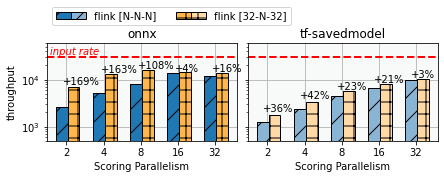

In [1377]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 16
font = {'size': 10}
matplotlib.rc('font', **font)
alpha = 1

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(7, 1.8), sharey=True)

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#1F77B4', '#FFB74D'])

# ir = ['onnx', 'tf-serving']
ir = ['2', '4', '8', '16', '32']
scl_labels = ["30000_1_2", "30000_1_4", "30000_1_8", "30000_1_16", "30000_1_32"]

f_low_onnx, f_low_onnx_std = [], []
f_low_tf_serving, f_low_tf_serving_std = [], []
f_onnx, f_onnx_std = [], []
f_tf_serving, f_tf_serving_std = [], []
processor_low = "flink-32-N-32"
processor = "flink"
for sc in scl_labels:
    sc_exps = average_measurements[sc]
    plow = sc_exps[processor_low]["ffnn"]
    if "onnx" in plow:
        f_low_onnx.append(mean(plow["onnx"]["throughput"]))
        f_low_onnx_std.append(plow["onnx"]["throughput"])
    else:
        f_low_onnx.append(1)
    f_low_tf_serving.append(mean(plow["tf-serving"]["throughput"]))
    f_low_tf_serving_std.append(plow["tf-serving"]["throughput"])
    if processor in sc_exps:
        p = sc_exps[processor]["ffnn"]
        f_onnx.append(mean(p["onnx"]["throughput"]))
        f_onnx_std.append(p["onnx"]["throughput"])
        f_tf_serving.append(mean(p["tf-serving"]["throughput"]))
        f_tf_serving_std.append(p["tf-serving"]["throughput"])
    else:
        f_onnx.append(1)
        f_tf_serving.append(1)

print("Parallelism on scoring operator:", ir)
print("\nMaximum throughput achieved")
print("Flink 32-N-32 ONNX:", f_low_onnx)
print(" Raw:", f_low_onnx_std)
print("\nFlink N-N-N ONNX:", f_onnx)
print(" Raw:", f_onnx_std)
print("\nFlink 32-N-32 TF-Serving:", f_low_tf_serving)
print(" Raw:", f_low_tf_serving_std)
print("\nFlink N-N-N TF-Serving:", f_tf_serving)
print(" Raw:", f_tf_serving_std)

i = 0
diffs_onnx = []
while i < len(f_low_onnx):
    baseline = f_onnx[i]
    new = f_low_onnx[i]
    if baseline > new:
        increase = baseline - new
        increase = increase / baseline * 100
        diffs_onnx.append('-' + str(math.floor(increase)) + '%')
    else:
        increase = new - baseline
        increase = increase / baseline * 100
        diffs_onnx.append('+' + str(math.floor(increase)) + '%')
    i = i + 1
# print("Diffs onnx:", diffs_onnx)

i = 0
diffs_tfsavedmodel = []
while i < len(f_low_onnx):
    baseline = f_tf_serving[i]
    new = f_low_tf_serving[i]
    if baseline > new:
        increase = baseline - new
        increase = increase / baseline * 100
        diffs_tfsavedmodel.append('-' + str(math.floor(increase)) + '%')
    if baseline <= new:
        increase = new - baseline
        increase = increase / baseline * 100
        diffs_tfsavedmodel.append('+' + str(math.floor(increase)) + '%')
    i = i + 1
# print("Diffs tf-savedmodel:", diffs_tfsavedmodel)

X = np.arange(len(ir))
width = 0.32

ax1.bar(X, f_onnx, width=width, label='flink [N-N-N]', color=next(colors), hatch=next(hatches), edgecolor='black')
ax1.bar(X + width, f_low_onnx, width=width, label='flink [32-N-32]', color=next(colors), hatch=next(hatches),
        edgecolor='black')
ax1.set_title('onnx', fontsize=12)

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#8AB4D4', '#FFDAA7'])

ax2.bar(X, f_tf_serving, width=width, label='flink [N-N-N]', color=next(colors), hatch=next(hatches),
        edgecolor='black')
ax2.bar(X + width, f_low_tf_serving, width=width, label='flink [32-N-32]', color=next(colors),
        hatch=next(hatches), edgecolor='black')
ax2.set_title('tf-savedmodel', fontsize=12)

axs = [ax1, ax2]

for ax in axs:
    ax.axhline(y=30000, color='r', linestyle='--', linewidth=2)
    ax.set_ylim((500, 60000))
    ax.set_yscale('log')
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_xticks([i + 0.13 for i in X], ir)
    ax.set_axisbelow(True)
#     ax.set_ylim(ymax=20000)

ax1.text(-0.3, 35000, 'input rate', color='r', fontsize=10, fontstyle='oblique')
ax1.set_ylabel('throughput')
ax1.set_xlabel('Scoring Parallelism')
for i in range(len(f_low_onnx)):
    ax1.text(i + 0.05, f_low_onnx[i] + 1000, diffs_onnx[i])

for i in range(1, len(f_low_onnx)):
    ax2.text(i, f_low_tf_serving[i] + 700, diffs_tfsavedmodel[i])
ax2.text(0, f_low_tf_serving[0] + 350, diffs_tfsavedmodel[0])
ax2.set_xlabel('Scoring Parallelism')

ax1.set_facecolor("#F8F9F9")
ax2.set_facecolor("#F8F9F9")

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
labels = labels + labels2
handles = handles + handles2
unique_labels = ['flink [N-N-N]', 'flink [32-N-32]']
combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

ax1.legend(handles=combined_handles, labels=unique_labels, handlelength=3,
           handler_map={tuple: HandlerTuple(ndivide=None, pad=0)}, ncol=4, loc='center left',
           bbox_to_anchor=(0, 1.28))

plt.subplots_adjust(wspace=0.06, hspace=0)

# ax2.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.savefig('parallelism-models.pdf', bbox_inches='tight')

# Kafka vs no Kafka

In [1160]:
th_labels = ["1024_1_1", "4096_1_1", "8192_1_1"]
ir = [1024, 4096, 8192]
flink_version = "flink-32-N-32"

tfr_flink_onnx = []
tfr_flink_onnx_standalone = []
for ts_l in th_labels:
    th_exps = average_measurements[ts_l]
    if flink_version in th_exps:
        tfr_flink_onnx.append(mean(th_exps[flink_version]["ffnn"]["onnx"]["throughput"]))
        tfr_flink_onnx_standalone.append(mean(th_exps[flink_version]["ffnn"]["standalone"]["throughput"]))

print("Input rates:", ir)
print("\nMaximum throughput achieved")
print("Crayfish + Flink ONNX:", tfr_flink_onnx)
print("Flink Standalone ONNX:", tfr_flink_onnx_standalone)

Input rates: [1024, 4096, 8192]

Maximum throughput achieved
Crayfish + Flink ONNX: [5373.158662840691]
Flink Standalone ONNX: [5506.673910808946]


Kafka (Crayfish, Flink, ONNX): [151.7728431099991, 228.35736811926606, 579.3018433179723]
No Kafka (Flink, ONNX): [61.42895263509006, 92.44865864939871, 254.6467213114754]


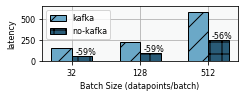

In [1259]:
import math

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 14
font = {'size'   : 8}
matplotlib.rc('font', **font)
alpha = 1

fig, ax1 = plt.subplots(1,figsize=(3.5, 1))

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#6BA8C7', '#295B77'])

bs = ['32', '128', '512']
scl_labels = ["1_32_1", "1_128_1", "1_512_1"]
flink_version = "flink-32-N-32"

sc_flink_onnx = []
sc_flink_onnx_standalone = []
for sc in scl_labels:
    sc_exps = average_measurements[sc]
    sc_flink_onnx.append(mean(sc_exps[flink_version]["ffnn"]["onnx"]["latency"]))
    sc_flink_onnx_standalone.append(mean(sc_exps[flink_version]["ffnn"]["standalone"]["latency"]))

print("Kafka (Crayfish, Flink, ONNX):", sc_flink_onnx)
print("No Kafka (Flink, ONNX):", sc_flink_onnx_standalone)

for i in range(len(sc_flink_onnx)):
    baseline = sc_flink_onnx_standalone[i]
    new = sc_flink_onnx[i]
    increase = new - baseline
    increase = increase / baseline * 100
    
i = 0
c = []
while i < len(sc_flink_onnx):
    new = sc_flink_onnx_standalone[i]
    baseline = sc_flink_onnx[i]
    if baseline > new:
        increase = baseline - new
        increase = increase / baseline * 100
        c.append('-' + str(math.floor(increase)) + '%')
    if baseline < new:
        increase = new - baseline
        increase = increase / baseline * 100
        c.append('+' +str(math.floor(increase)) + '%')
    i = i + 1
X = np.arange(len(bs))
width = 0.3

ax1.bar(X, sc_flink_onnx, width = width, label='kafka', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, sc_flink_onnx_standalone, width = width, label='no-kafka', color=next(colors), hatch = next(hatches), edgecolor='black')

for i, v in enumerate(sc_flink_onnx_standalone):
    ax1.text(i + 0.2, v + 20, c[i])

ax1.set_xticks([i + 0.15 for i in X], bs)
ax1.set_ylim(ymax=650)
ax1.legend(ncol=1)
ax1.set_xlabel('Batch Size (datapoints/batch)')
ax1.set_ylabel('latency')
ax1.set_axisbelow(True)
ax1.grid(True)
ax1.set_facecolor("#F8F9F9")
plt.savefig('flink-onnx-standalone-latency-comparison.pdf', bbox_inches='tight')